# Statistical Power Assignment

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from statsmodels.stats.power import TTestIndPower

import matplotlib.pyplot as plt

%matplotlib inline

## Computing Sample Size Required
Suppose we are conducting a test where we have:

Effect size of 0.5
Significance level of 0.05
Looking to achieve 80% statistical power
How large of a sample size would we need for this experiment?

In [5]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=0.5, nobs1=None
    , alpha=0.05
    , power= 0.80
)

63.76561177540974

## Computing Effect Size Required
Suppose we are conducting a test where we have:

Sample size of 100
Significance level of 0.05
Looking to achieve 80% statistical power
How large of an effect size would we need to see for this experiment?

In [6]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=None, nobs1=100
    , alpha=0.05
    , power= 0.80

)

0.3981391173911278

Generate a power plot that shows how the statistical power of this test would change based on the number of observations and varying effect sizes.

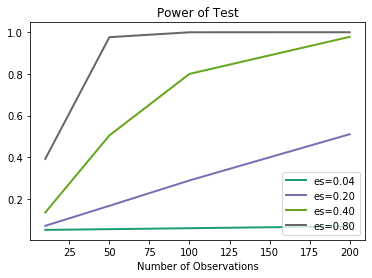

In [8]:
n = 100
es = 0.3981391173911278

sample_sizes = np.array([n * 0.1, n * 0.5, n, n * 2])
effect_sizes = np.array([es * 0.1, es * 0.5, es, es * 2])

analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
)
plt.show()

## Computing Statistical Power
Suppose we are conducting a test where we have:

Effect size of 0.4
Sample size of 100
Significance level of 0.05
What would be the statistical power for this experiment?

In [9]:
TTestIndPower().solve_power(
    effect_size=0.4
    , nobs1=100
    , alpha=0.05
    , power = None
)

0.8036474965430749

Generate a plot that examines how the statistical power of this experiment would change based on different significance levels.

In [38]:
print(sig_levels)
print(sample_sizes)
print(effect_sizes)

[0.005 0.025 0.05  0.1  ]
[ 10.  50. 100. 200.]
[0.03981391 0.19906956 0.39813912 0.79627823]


[0.005 0.025 0.05  0.1  ]


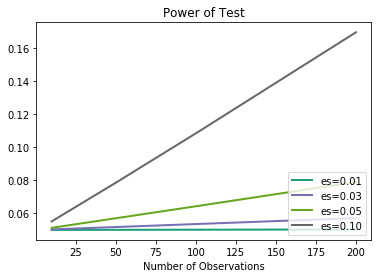

In [49]:
es = 0.05
sample_sizes = np.array([n * 0.1, n * 0.5, n, n * 2])
print(sig_levels)
effect_sizes = np.array([es * 0.1, es * 0.5, es, es * 2])
analysis.plot_power(
    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size = effect_sizes
)
#analysis.plot_power(
#    dep_var="nobs", nobs=sample_sizes, alpha=0.05, effect_size=effect_sizes
#)

plt.show()


## Computing Statistical Power for a Real Data Set
Yesterday afternoon, you conducted a t-test on the titanic data set to determine whether there was a significant difference between the average age of passengers who survived and those who did not survive. In this section, compute the statistical power of that test.

Import the data, and drop rows where 'Age' is NA.

In [16]:
data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv'
titanic_df = pd.read_csv(data_url)
new_titanic_df = titanic_df.dropna()
new_titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Summarize the number of observations and average age per group.

In [23]:
survived = new_titanic_df[(new_titanic_df['Survived'] == 1)]
not_survived = new_titanic_df[(new_titanic_df['Survived'] == 0)]

In [26]:
average_age_survive = survived['Age'].mean()
average_age_not_survive = not_survived['Age'].mean()
print('The average age of people who survived was ', average_age_survive)
print('The average age of people who did not survive was ', average_age_not_survive)

The average age of people who survived was  32.905853658536586
The average age of people who did not survive was  41.35


Perform t-test.

In [27]:
t, p = stats.ttest_ind(survived['Age'], not_survived['Age'])
if p < 0.05:
    print('reject null')
else:
    print('do not reject null')

reject null


## Calculate the Effect Size
Effect size can be calculated by using a formula known as Cohen's d, which divides the difference in means between the two groups by their pooled standard deviation.

effect_size = (mean_of_sample1 - mean_of_sample2) / pooled_stdev

The pooled standard deviation in the denominator can be derived as follows.

pooled_stdev = sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))

Where n_obs is the number of observations and var is the variance of each sample.

Write the code below to calculate the effect size for this test.

In [63]:
n_obs1 = len(survived)
n_obs2 = len(not_survived)
var1 = survived['Age'].var()
var2 = not_survived['Age'].var()

In [65]:
num = average_age_not_survive - average_age_survive
den = np.sqrt(((n_obs1 - 1) * var1 + (n_obs2 - 1) * var2) / (n_obs1 + n_obs2 - 2))
effect_size = num / den
effect_size

0.5565536974630488

Use the effect size you calculated to compute the statistical power of this test.

In [66]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=effect_size, nobs1=n_obs1
    , alpha=0.05
)

0.9915159226422946

Determine the effect size we would need to see to get a statistical power of 0.8.

In [67]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=None, nobs1=n_obs1
    , alpha = 0.05
    , power = 0.8
)

0.35865849694732793

Determine the sample size necessary to get a statistical power of 0.8.

In [68]:
analysis = TTestIndPower()
analysis.solve_power(
    effect_size=effect_size, nobs1=None
    , alpha = 0.05
    , power = 0.8
)

51.65649230482026

Generate a visualization that shows the significance level we would need to get a statistical power of 0.8.